In [2]:
#Linear regression project
#Predicting player efficiency rate(PER)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nba = pd.read_csv(r"E:\Data science\database_24_25.csv")
nba

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,Emoni Bates,CLE,WAS,W,5.18,0,2,0.000,0,2,...,0,0,2,0,0,0,2,0,-0.8,2025-02-07
16508,A.J. Green,MIL,ATL,L,20.75,1,5,0.200,0,2,...,1,1,1,0,0,0,2,2,-0.9,2025-02-07
16509,Kenrich Williams,OKC,TOR,W,16.70,0,5,0.000,0,3,...,1,3,2,0,0,1,0,0,-1.4,2025-02-07
16510,Tyrese Martin,BRK,MIA,W,20.70,1,5,0.200,0,4,...,5,5,1,0,0,3,2,2,-2.7,2025-02-07


In [4]:
nba.columns[nba.isna().any()]

Index([], dtype='object')

In [5]:
nba.columns

Index(['Player', 'Tm', 'Opp', 'Res', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'GmSc', 'Data'],
      dtype='object')

In [6]:
#for PER we need X=Assists,Rebounds,FG%  Y = Gamescore for this r2score is 0.60
#so i add more columns to improve the efficiency of the model,after r2score is 0.92
x=nba[['AST','TRB','FG%','PTS','MP','STL','BLK','FT%']]
y=nba['GmSc']

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [8]:
ypred = model.predict(xtest)
ypred

array([12.39042419,  1.14430009,  4.4291771 , ...,  4.75699416,
        7.77502015, 34.80726384])

In [9]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.92901410175639

In [10]:
x.columns

Index(['AST', 'TRB', 'FG%', 'PTS', 'MP', 'STL', 'BLK', 'FT%'], dtype='object')

In [11]:
x

,AST,TRB,FG%,PTS,MP,STL,BLK,FT%
0,10,4,0.778,37,30.30,1,1,0.500
1,4,16,0.478,36,37.58,1,3,0.867
2,4,3,0.615,24,26.63,1,0,1.000
3,4,4,0.778,18,30.52,1,0,0.000
4,2,0,0.800,22,25.85,0,0,0.667
...,...,...,...,...,...,...,...,...
16507,2,0,0.000,0,5.18,0,0,0.000
16508,1,1,0.200,2,20.75,0,0,0.000
16509,2,3,0.000,0,16.70,0,0,0.000
16510,1,5,0.200,2,20.70,0,0,0.000


In [12]:
#Here I use the last 5 avg points scored by a player to prdict the next match point
sample=np.array([[5,6,0.87,20,10.30,0,2,0.55]])
sample

array([[ 5.  ,  6.  ,  0.87, 20.  , 10.3 ,  0.  ,  2.  ,  0.55]])

In [13]:
game_score=model.predict(sample)
game_score[0]

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(21.342766716220268)

In [14]:
relation = x.corr()
relation

,AST,TRB,FG%,PTS,MP,STL,BLK,FT%
AST,1.000000,0.293143,0.122263,0.502958,0.564934,0.267667,0.063378,0.297238
TRB,0.293143,1.000000,0.244066,0.438975,0.553017,0.179692,0.337803,0.271313
FG%,0.122263,0.244066,1.000000,0.430738,0.277323,0.104454,0.132052,0.166461
PTS,0.502958,0.438975,0.430738,1.000000,0.742498,0.286463,0.171846,0.519117
MP,0.564934,0.553017,0.277323,0.742498,1.000000,0.372019,0.247741,0.446757
STL,0.267667,0.179692,0.104454,0.286463,0.372019,1.000000,0.082849,0.164760
BLK,0.063378,0.337803,0.132052,0.171846,0.247741,0.082849,1.000000,0.124771
FT%,0.297238,0.271313,0.166461,0.519117,0.446757,0.164760,0.124771,1.000000


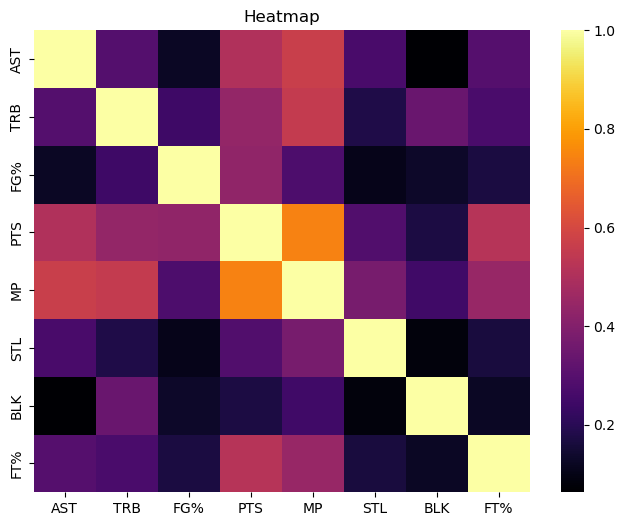

In [21]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(relation,cmap="inferno")
plt.title("Heatmap")
plt.show()

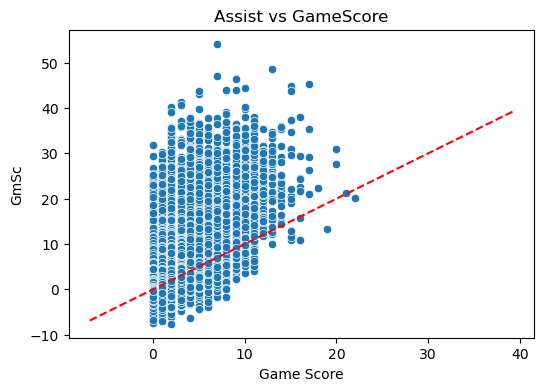

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='AST',y='GmSc',data=nba)
plt.xlabel("Assist")
plt.xlabel("Game Score")
plt.title("Assist vs GameScore")
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--',label="Actual DATA")
plt.show()

In [17]:
x.columns


Index(['AST', 'TRB', 'FG%', 'PTS', 'MP', 'STL', 'BLK', 'FT%'], dtype='object')

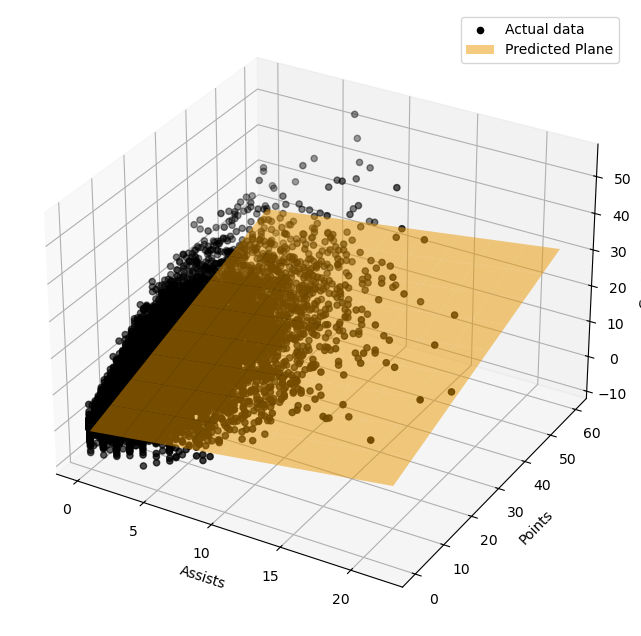

<Figure size 640x480 with 0 Axes>

In [18]:
x1=np.linspace(nba['AST'].min(),nba['AST'].max(),10)
y1=np.linspace(nba['PTS'].min(),nba['PTS'].max(),10)
x2,y2 = np.meshgrid(x1,y1)
z1=model.intercept_+model.coef_[0]*x2+model.coef_[1]*y2
z1=z1.astype('float')
x2=x2.astype('float')
y2=y2.astype('float')
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(nba['AST'],nba['PTS'],nba['GmSc'],color='Black',label='Actual data')
ax.plot_surface(x2,y2,z1,color='Orange',alpha=0.5,label='Predicted Plane')
ax.set_xlabel('Assists')
ax.set_ylabel('Points')
ax.set_zlabel('Game Score')
ax.legend()
plt.show()
plt.savefig("3D_Plot.png",dpi=300,bbox_inches = 'tight')